# Predictive Modeling for Agriculture

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, I apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity

In [38]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
crops

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
...,...,...,...,...,...
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee


In [30]:
# Check for missing values
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [31]:
# Check how many crops we have, i.e., multi-class target
crops.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    crops[["N", "P", "K", "ph"]],
    crops["crop"],
    test_size=0.2,
    random_state=42
)

In [33]:
# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial",
    )
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.10507916708090527
F1-score for P: 0.10457380486654515
F1-score for K: 0.2007873036107074
F1-score for ph: 0.04532731061152114


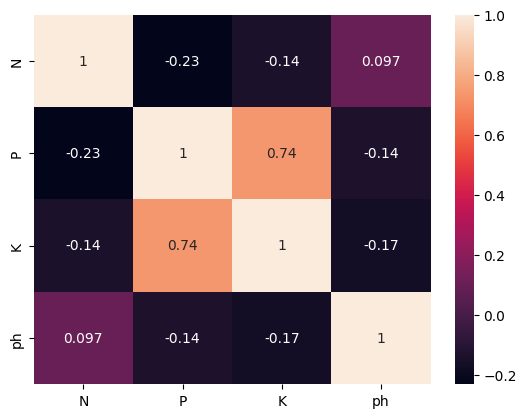

In [34]:
crops_corr = crops[['N','P','K','ph']].corr()

sns.heatmap(crops_corr, annot=True)
plt.show()

In [35]:
final_features = ['N','K','ph']

X_train, X_test, y_train, y_test = train_test_split(crops[final_features], crops['crop'],test_size=0.2,random_state=42)

In [40]:
log_reg = LogisticRegression(max_iter=2000,multi_class='multinomial')
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test,y_pred,average='weighted')
model_performance

0.558010495235685

In [41]:
# Calculate the F1-score for each crop separately
crop_f1 = f1_score(y_test, y_pred, labels=crops['crop'].unique(), average=None)

# Create a DataFrame to store the crops and their corresponding F1-scores
crop_f1_df = pd.DataFrame({"Crop": crops['crop'].unique(), "F1-score": crop_f1})

# Sort the crops based on their F1-score in descending order to find the best performing crops
best_performing_crops = crop_f1_df.sort_values(by='F1-score', ascending=False)

# Print the best performing crops along with their F1-scores
print("Best Performing Crops:")
print(best_performing_crops)

Best Performing Crops:
           Crop  F1-score
2      chickpea  1.000000
16       orange  0.965517
1         maize  0.894737
19       cotton  0.888889
17       papaya  0.862745
21       coffee  0.810811
10       banana  0.750000
9   pomegranate  0.717949
20         jute  0.541667
7     blackgram  0.511628
12       grapes  0.487805
18      coconut  0.480000
13   watermelon  0.450000
11        mango  0.448980
3   kidneybeans  0.431373
14    muskmelon  0.424242
15        apple  0.363636
8        lentil  0.363636
0          rice  0.285714
5     mothbeans  0.263158
6      mungbean  0.222222
4    pigeonpeas  0.108108
